In [1]:
from material_class import Material, Fit, DataSet
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from scipy.special import erf

from fit_types import Nppoly, polylog, loglog_func, linear_fit, get_func_type
from tc_utils import *

## Adding Parents

In [ ]:
material_of_interest = os.listdir("lib")
def set_parent(search_string, parent_string):
    for material in material_of_interest:
        if material.startswith(search_string):
            material_folder = os.path.join("lib", material)
            pickle_file = os.path.join(material_folder, "material.pkl")
            # Load the material of interest from the saved pickle file
            testmat = pickle.load(open(pickle_file, "rb"))
            testmat.parent=parent_string
            with open(pickle_file, "wb") as f:
                pickle.dump(testmat, f)

set_parent("Aluminum_", "Aluminum")
set_parent("CFRP_", "CFRP")
set_parent("G10_", "G10_parent")
set_parent("Graphite_", "Graphite")
set_parent("Nickel_Steel_", "Nickel_Steel")
set_parent("Polystyrene_", "Polystyrene")
set_parent("Polyurethane_", "Polyurethane")
set_parent("PVC_", "PVC")
set_parent("Stainless_Steel_", "Stainless_Steel")
set_parent("Wood_", "Wood")


## Cu_OFHC

Loading Cu_OFHC from pickle


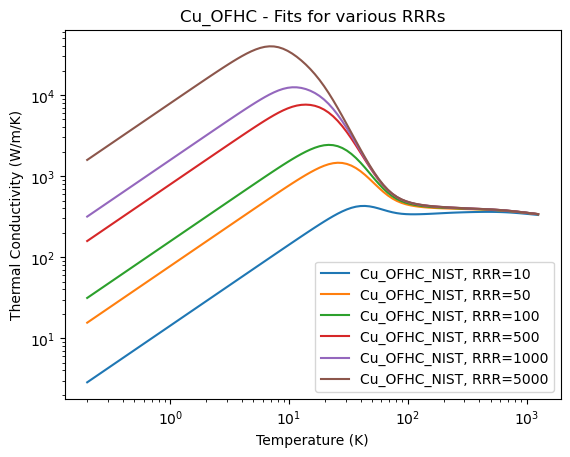

C:\Users\henac\AppData\Local\Temp\ipykernel_20508\655283424.py:50: UserWarning: loadtxt: input contained no data: "lib\Cu_OFHC\raw_reference_data\all_references.txt"
  reference = np.loadtxt(data_path, delimiter=",", max_rows=1, dtype=str)


In [10]:
material_of_interest = "Cu_OFHC"#_Clearwater"


material_folder = os.path.join("lib", material_of_interest)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {material_of_interest} from pickle")
# Load the material of interest from the saved pickle file
testmat = pickle.load(open(pickle_file, "rb"))
# print(testmat.room_temp)
# print([fit.name for fit in testmat.fits])
# testmat.fits[0].range = (4, 300)
# testmat.update_data()
# testmat = testmat.update_fit("Superconducting")
# print(testmat.fits[1].parameters)
# print([fit.fit_type for fit in testmat.fits])
# testmat.interpolate_function = testmat.interpolate(preferred_fit=testmat.fits[5])
# print(testmat.parent)
# testmat.plot_data()

# OFHC_RRR_Wc,0.2,1250,??,0.631,1.754e-08,2.763,1102,-0.165,70,1.765,0.2351,0.1661,-0.00012,420,470,0.7,-0.00016,73,87,0.45,-0.000010,18,21,0.5
# new_fit = Fit("Cu_OFHC", "NIST", (0.2, 1250),
#               [0.631,1.754e-08,2.763,1102,-0.165,70,1.765,0.2351,0.1661,-0.00012,420,470,0.7,-0.00016,73,87,0.45,-0.000010,18,21,0.5], [], "OFHC_RRR_Wc", None)
# testmat.fits.append(new_fit)
use_fit = testmat.fits[0]
RRR_list = [10, 50, 100, 500, 1000, 5000]

xs = np.logspace(np.log10(use_fit.range[0]), np.log10(use_fit.range[1]), 100)
for RRR in RRR_list:
    ys = use_fit.function()(xs, [RRR], *use_fit.parameters)
    plt.loglog(xs, ys, label=f"{use_fit.name}, RRR={RRR}")

plt.xlabel("Temperature (K)")
plt.ylabel("Thermal Conductivity (W/m/K)")
plt.title(f"{material_of_interest} - Fits for various RRRs")
plt.legend()
plot_folder = os.path.join(material_folder, "PLOTS")

plt.savefig(os.path.join(plot_folder, f"{material_of_interest}_comparison_fits.png"), dpi=300)
plt.savefig(os.path.join(plot_folder, f"{material_of_interest}_comparison_fits.pdf"), dpi=300)
plt.show()

data_folder = os.path.join(material_folder, "raw_reference_data")
# Print all references to a single file
all_references_file = os.path.join(data_folder, "all_references.txt")
with open(all_references_file, "w") as ref_file:
    for file in os.listdir(data_folder):
        if file.endswith(".txt") or file.endswith(".csv"):
            data_path = os.path.join(data_folder, file)
            reference = np.loadtxt(data_path, delimiter=",", max_rows=1, dtype=str)
            ref_file.write(f"File: {file}\n")
            for line in reference:
                # Clean the line to remove bad characters
                clean_line = ''.join(char for char in line if char.isprintable())
                ref_file.write(f"{clean_line}\n")
            ref_file.write("\n" + "="*50 + "\n\n")

with open(pickle_file, "wb") as f:
    pickle.dump(testmat, f)